# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat2017 = pd.read_csv("../data/sat_2017.csv")
act2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
# Examine Dimensions and Features
print("SAT 2017 data has", sat2017.shape[0],"'states' and", sat2017.shape[1],"columns")
print("...where columns are",list(sat2017.columns))

print("ACT 2017 data has", act2017.shape[0],"'states' and", act2017.shape[1],"columns")
print("...where columns are",list(act2017.columns))

SAT 2017 data has 51 'states' and 5 columns
...where columns are ['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math', 'Total']
ACT 2017 data has 52 'states' and 7 columns
...where columns are ['State', 'Participation', 'English', 'Math', 'Reading', 'Science', 'Composite']


In [6]:
# Find the difference in State columns
print("ACT data has one extra 'State' which is ",list(set(act2017['State']) - set(sat2017['State'])))

ACT data has one extra 'State' which is  ['National']


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<span style="color:blue"> **Answer**: Both SAT and ACT data files show a decomposition of participation rates, average by-section scores, and average total/composite scores for each US state. A major difference is that the ACT file includes a line item for the national level while the SAT file omits it. We also notice some typos in both data files, namely the SAT Math and ACT Science average for Maryland and the ACT Composite score for Wyoming (work for how these errors were caught will be shown below).

#### 4a. Does the data look complete? 

<span style="color:blue"> **Answer**: If by complete we mean no missing values, then *YES* they are complete. Note again however that the SAT data doesn't report national participation rate or scores, while the ACT does. Data cleaning is required to fix the 3 typos we mentioned above.

In [7]:
sat2017.info()
# complete: all rows filled with no nulls
# participation should be int, but is a string because of the "%"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act2017.info()
# complete: all rows filled with no nulls
# participation should be int but is a string because of the "%"
# composite should be float64 but appears at least one cell isn't so we'll look into it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<span style="color:blue"> **Answer:** See the `.describe()` tables below for reported min values for each test/subtest...

In [9]:
### SAT test/subtest mins ###
sat2017.describe() # Something went wrong with the min in the math section: 52 looks like a typo...off by a factor of 10

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
# Error Deep Dive: Questionable SAT Math min
sat2017.sort_values('Math').head() # It's Maryland's SAT Math score that's the issue! Looks like a typo...should be 524

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [11]:
### ACT test/subtest mins ###
act2017.describe() # Something went wrong with the min in the Science section: 2.3 looks like a typo...off by a factor of 10
# Also, we notice that the Composite column is missing. Since the column isn't a float, Python can't compute stats on it.

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [12]:
# Error Deep Dive: Missing Composite Column
act2017[['State','Composite']].tail() # Wyoming's Composite has a stray 'x' in the cell which is forcing it to be a string

,State,Composite
47,Virginia,23.8
48,Washington,21.9
49,West Virginia,20.4
50,Wisconsin,20.5
51,Wyoming,20.2x


In [13]:
# Error Deep Dive: Questionable ACT Science min
act2017.sort_values('Science').head() # It's Maryland again but the ACT Science score this time. Should be 23.2

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [14]:
# Correcting Maryland's SAT Math score typo:
sat2017['Math'][(sat2017['State'] == "Maryland")] = 524

C:\Users\Adiwid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Correcting Maryland's ACT Science score typo:
act2017['Science'][(act2017['State'] == "Maryland")] = 23.2

C:\Users\Adiwid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
# SAT dtypes
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
# ACT dtypes
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<span style="color:blue"> **Answer:** As pointed out earlier in 4a, for both SAT and ACT data, the Participation feature should be `int`, however it is an object (well string) because of the "%" symbol in each of the cells. In addition, the ACT Composite should be `float`, but it isn't because of the `".x"` typo in Wyoming's ACT Composite score.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
def remove_percent(column):
    cleaned_col = column.map(lambda string: string.replace('%',''))
    cleaned_col = cleaned_col.astype(int)
    return(cleaned_col)

- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
# Correcting Wyoming's ACT Composite score typo:
act2017['Composite'][(act2017['State'] == "Wyoming")] = 20.2
act2017['Composite'] = act2017['Composite'].astype(float)

C:\Users\Adiwid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
sat2017['Participation'] = remove_percent(sat2017['Participation'])
act2017['Participation'] = remove_percent(act2017['Participation'])

- Display the data types again to confirm they are correct.

In [21]:
# SAT dtypes
sat2017.dtypes

State                                 object
Participation                          int32
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [22]:
# ACT dtypes
act2017.dtypes

State             object
Participation      int32
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
sat2017.columns = ['state', 'sat_2017_participation', 'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total']
act2017.columns = ['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math', 'act_2017_reading', 
                   'act_2017_science', 'act_2017_composite']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**This is a template of what our working dictionary will look like. We will add this into our READEME.md file:**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT/SAT|the US state under consideration| 
|**sat_2017_participation**|*int*|SAT|percentage of high school students (freshman through senior) in the state that took the SAT in 2017| 
|**sat_2017_reading_and_writing**|*int*|SAT|scaled score between 200-800 (inclusive) measuring verbal reasoning, averaged over all test takers in state in 2017| 
|**sat_2017_math**|*int*|SAT|scaled score between 200-800 (inclusive) measuring mathematical reasoning, averaged over all test takers in state in 2017| 
|**sat_2017_total**|*int*|SAT|sum of verbal and reading score, averaged over all test takers in state in 2017| 
|**act_2017_participation**|*int*|ACT|percentage of high school students (freshman through senior) in the state that took the ACT in 2017|
|**act_2017_english**|*float*|ACT|scaled score between 1-36 (inclusive) measuring command of grammar, averaged over all test takers in state in 2017|
|**act_2017_math**|*float*|ACT|scaled score between 1-36 (inclusive) measuring mathematical reasoning, averaged over all test takers in state in 2017|
|**act_2017_reading**|*float*|ACT|scaled score between 1-36 (inclusive) measuring reading comprehension, averaged over all test takers in state in 2017|
|**act_2017_science**|*float*|ACT|scaled score between 1-36 (inclusive) measuring scientific reasoning, averaged over all test takers in state in 2017|
|**act_2017_composite**|*float*|ACT|mean of English, Math, Reading, and Science scores, averaged over all test takers in state in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
rows2drop = act2017[act2017["state"] == "National"].index
act2017.drop(rows2drop, axis = 0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
combined_2017 = pd.merge(sat2017, act2017, on = "state")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
# Import Data
sat2018 = pd.read_csv("../data/East_Coast_Data_Entry - SAT 2018.csv")
act2018 = pd.read_csv("../data/East_Coast_Data_Entry - ACT 2018.csv")

In [28]:
# First glance at data
sat2018.head(10)
act2018.head(10)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,"Washington, D.C.",32%,23.6
9,Florida,66%,19.9


In [29]:
# Check for missing values and feature classes
print(sat2018.info())
print("----------------------------------------------------")
print(act2018.info())

# We notice that the Participation column is facing the same issue so we'll fix that with our function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State                                 52 non-null object
Participation                         52 non-null object
Evidence-Based Reading and Writing    52 non-null int64
Math                                  52 non-null int64
Total                                 52 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None


In [30]:
# Clean Participation column
sat2018['Participation'] = remove_percent(sat2018['Participation'])
act2018['Participation'] = remove_percent(act2018['Participation'])

In [31]:
# Check Data Types again
print(sat2018.dtypes)
print("---------------------------------------------")
print(act2018.dtypes)

State                                 object
Participation                          int32
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
---------------------------------------------
State             object
Participation      int32
Composite        float64
dtype: object


In [32]:
# Check out summary statistics for signs of any out of whack values
print(sat2018.describe())
print("------------------")
print(act2018.describe())

       Participation  Evidence-Based Reading and Writing        Math  \
count      52.000000                           52.000000   52.000000   
mean       45.346154                          567.711538  558.442308   
std        36.941865                           44.864649   48.977551   
min         2.000000                          497.000000  480.000000   
25%         4.750000                          535.000000  521.750000   
50%        49.500000                          558.000000  547.000000   
75%        76.750000                          615.750000  598.000000   
max       100.000000                          643.000000  655.000000   

             Total  
count    52.000000  
mean   1126.153846  
std      93.513632  
min     977.000000  
25%    1063.500000  
50%    1102.500000  
75%    1215.000000  
max    1298.000000  
------------------
       Participation  Composite
count      52.000000  52.000000
mean       61.500000  21.496154
std        33.740939   2.090779
min         7.0

In [33]:
# Rename Columns
sat2018.columns = ['state', 'sat_2018_participation', 'sat_2018_reading_and_writing', 'sat_2018_math', 'sat_2018_total']
act2018.columns = ['state', 'act_2018_participation', 'act_2018_composite']

# Rename Washington, DC --> "District of Columbia"
act2018['state'].replace("Washington, D.C.", "District of Columbia", inplace=True)

# Get rid of National line in ACT 2018 data
rows2drop = act2018[act2018["state"] == "National"].index
act2018.drop(rows2drop, axis = 0, inplace=True)

# Combine 2018 data
combined_2018 = pd.merge(sat2018, act2018, on = "state")

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [34]:
final = pd.merge(combined_2017, combined_2018, how="outer", on="state")
final.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [35]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [36]:
def stdev(series):
    ssd = 0                                # ssd = sum of squared differences (from the mean)
    for num in series:
        ssd += (num - np.mean(series))**2
    std_dev = np.sqrt(ssd/len(series))
    return(std_dev)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [37]:
sd_dict = {final.columns[col]: stdev(final.iloc[:,col]) for col in range(1, final.shape[1])}
sd_dict # !!! To fix...why does 2018 return nan?!

{'sat_2017_participation': 34.92907076664508,
 'sat_2017_reading_and_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 36.93321382897817,
 'sat_2018_reading_and_writing': 44.864630427956726,
 'sat_2018_math': 48.97751133618255,
 'sat_2018_total': 93.51362961350053,
 'act_2018_participation': 33.70173582041031,
 'act_2018_composite': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<span style="color:blue"> **Answer:** It does not match the output from pandas `.describe` which uses the sample standard deviation formula:
$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i - \mu)^2}$$
Our result does match numpy `std` method though since that uses the population standard deviation formula
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [38]:
# Example code for states with the lowest participation rates
final[['state','sat_2017_participation']].sort_values('sat_2017_participation').head()
final[['state','sat_2018_participation']].sort_values('sat_2018_participation').head()
final[['state','act_2017_participation']].sort_values('act_2017_participation').head()
final[['state','act_2018_participation']].sort_values('act_2018_participation').head()

,state,act_2018_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


In [39]:
# Example code for states with the highest participation rates
final[['state','sat_2017_participation']].sort_values('sat_2017_participation', ascending=False).head()
final[['state','sat_2018_participation']].sort_values('sat_2018_participation', ascending=False).head()
final[['state','act_2017_participation']].sort_values('act_2017_participation', ascending=False).head(20)
final[['state','act_2018_participation']].sort_values('act_2018_participation', ascending=False).head(20)

,state,act_2018_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


<span style="color:blue"> ***Findings: Participation Rate Lows and Highs***
- **SAT 2017**: 
    - Low = North Dakota, Mississippi, Iowa (2%)
    - High = DC, Michigan, Connecticut, Delaware (100%)
- **SAT 2018**:
    - Low = North Dakota (2%)
    - High = Michigan, Connecticut, Delaware, Idaho (100%)
- **ACT 2017**:
    - Low = Maine (8%)
    - High = Alabama, Kentucky, Wisconsin, Utah, Tennessee, ...and 12 more! (100%)
- **ACT 2018**:
    - Low = Maine (7%)
    - High = Alabama, Kentucky, Wisconsin, Utah, Tennessee, ...and 12 more! (100%)

In [40]:
# Example code for states with the HIGHEST mean total/composite scores
final[['state','sat_2017_total']].sort_values('sat_2017_total').head()
final[['state','sat_2018_total']].sort_values('sat_2018_total').head()
final[['state','act_2017_composite']].sort_values('act_2017_composite').head()
final[['state','act_2018_composite']].sort_values('act_2018_composite').head()

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [41]:
# Example code for states with the LOWEST mean total/composite scores
final[['state','sat_2017_total']].sort_values('sat_2017_total', ascending=False).head()
final[['state','sat_2018_total']].sort_values('sat_2018_total', ascending=False).head()
final[['state','act_2017_composite']].sort_values('act_2017_composite', ascending=False).head()
final[['state','act_2018_composite']].sort_values('act_2018_composite', ascending=False).head()

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


<span style="color:blue"> ***Findings: Total/Mean Score Lows and Highs***
- **SAT 2017 Total**
    - Low = DC (950)
    - High = Minnesota (1295)
- **SAT 2018 Total**
    - Low = Delaware (997)
    - High = Minnesota (1298)
- **ACT 2017 Composite**
    - Low = Nevada (17.8)
    - High = New Hampshire (25.5) 
- **ACT 2018 Composite**
    - Low = Nevada (17.7)
    - High = Connecticut (25.6)

In [42]:
# Compute participation change YoY
final['sat_participation_change'] = final['sat_2018_participation'] - final['sat_2017_participation']
final['act_participation_change'] = final['act_2018_participation'] - final['act_2017_participation']

# Code to filter states with 100% participation in at least 1 test on each day
mask100 = (final['sat_2017_participation'] == 100) | (final['sat_2018_participation'] == 100) | (final['act_2017_participation'] == 100) | (final['act_2018_participation'] == 100)
the100 = final.loc[mask100,['state','sat_2017_participation','sat_2018_participation', 'sat_participation_change',
                   'act_2017_participation','act_2018_participation','act_participation_change']]

# Get subset of these states that saw change participation year over year
mask_changed = ~((the100['sat_participation_change']==0) & (the100['act_participation_change']==0))
changed_100s = the100.loc[mask_changed,['state','sat_participation_change','act_participation_change']]
print("The states that had 100% participation on either test that didn't change year over year are ",list(changed_100s['state']))

The states that had 100% participation on either test that didn't change year over year are  ['Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Idaho', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah']


<span style="color:blue">  **Findings: Do any states with 100% participation on a given test have a rate change year-to-year?**

<span style="color:blue"> All states that had 100% participation on any given test that changed year over year are  ['Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Idaho', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah']

In [43]:
# Code to filter states with >50% particiation on both tests
mask50 = ((final['sat_2017_participation'] > 50) & (final['act_2017_participation'] > 50)) | ((final['sat_2018_participation'] > 50) & (final['act_2018_participation'] > 50))
the50s = final.loc[mask50,['state','sat_2017_participation','sat_2018_participation',
                            'act_2017_participation','act_2018_participation']]
the50s.sort_values('state')
print("The states that had 50% participation on both tests in either year are ",list(the50s['state']))

The states that had 50% participation on both tests in either year are  ['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina']


<span style="color:blue"> **Findings: Do any states show have >50% participation on both tests either year?**

<span style="color:blue"> The states that had 50% participation on both tests in either year are  ['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina']

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

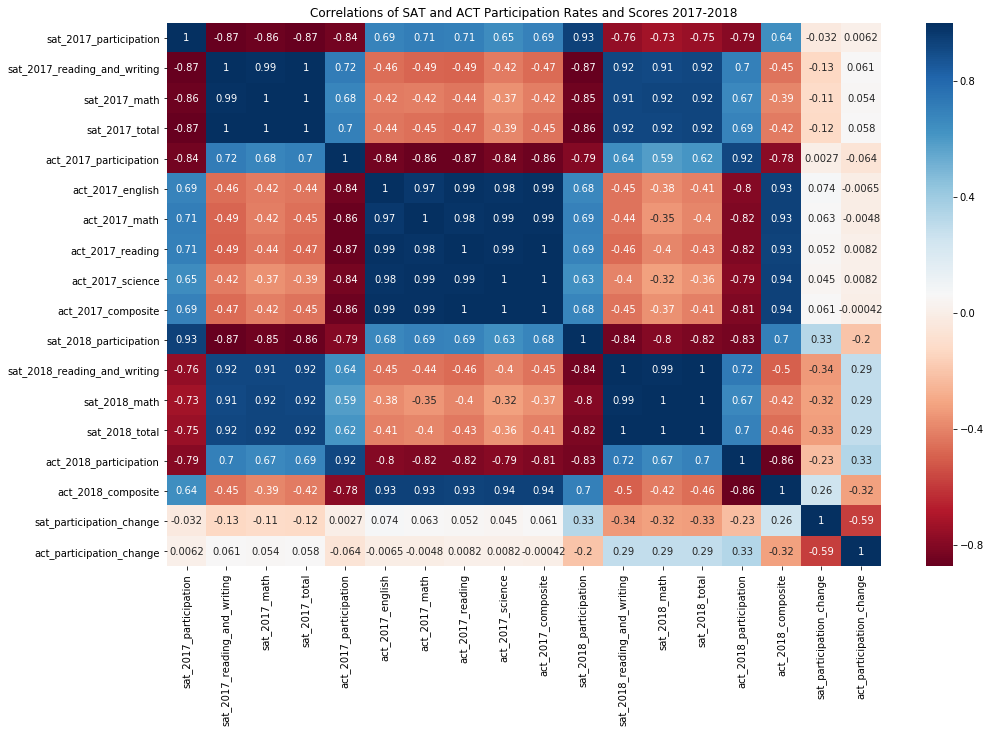

In [44]:
plt.figure(figsize=(16,10))
plt.title("Correlations of SAT and ACT Participation Rates and Scores 2017-2018")
sns.heatmap(final.corr(), annot=True, cmap="RdBu");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [45]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2))                    # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10)) # You'll want to specify your figsize
    ax = ax.ravel()                                                 # Ravel turns matrix into vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):                    # Gives us an index value to get into all our lists
        
    # Adjust shade by year
        if '2018' in column: shade = 0.5
        else: shade = 1
            
    # Adjust color by test type
        if 'act' in column: set_color = 'g'
        else: set_color = None
        
    # Set x-min and x-max depending on column we're looking at
        if ('participation' in column):
            xmin, xmax = 0,100
            xticks = [n for n in range(xmin,xmax+1,10)]
        elif ('sat' in column) & ('participation' not in column):
            xmin, xmax = 400, 700
            xticks = [n for n in range(xmin,xmax+1,50)]
        elif ('act' in column) & ('participation' not in column):
            xmin, xmax = 14,26
            xticks = [n for n in range(xmin,xmax+1)]
        else: xmin, xmax, xticks = None, None, None
        
     # Plot histogram
        ax[i].hist(dataframe[column], 
                   color = set_color,
                   alpha = shade,
                   range = (xmin, xmax), align = 'mid')
        
     # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize = 15)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)
        ax[i].set_ylabel("Frequency")
        
     # Add xticks and yticks
        #y_max = math.ceil(max(final[column]))+1
        y_max = 21
        ax[i].set_xticks(xticks)
        ax[i].set_ylim(bottom = 0, top = y_max)
        ax[i].set_yticks([n for n in range(0, y_max+1)])
        
     # Add mean marker (red line)
        ax[i].vlines(x = np.mean(final[column]), ymin = 0, ymax = y_max, color = 'r'); 
        
    if len(list_of_columns) % 2:
        plt.delaxes(ax[len(list_of_columns)])
    plt.tight_layout();

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

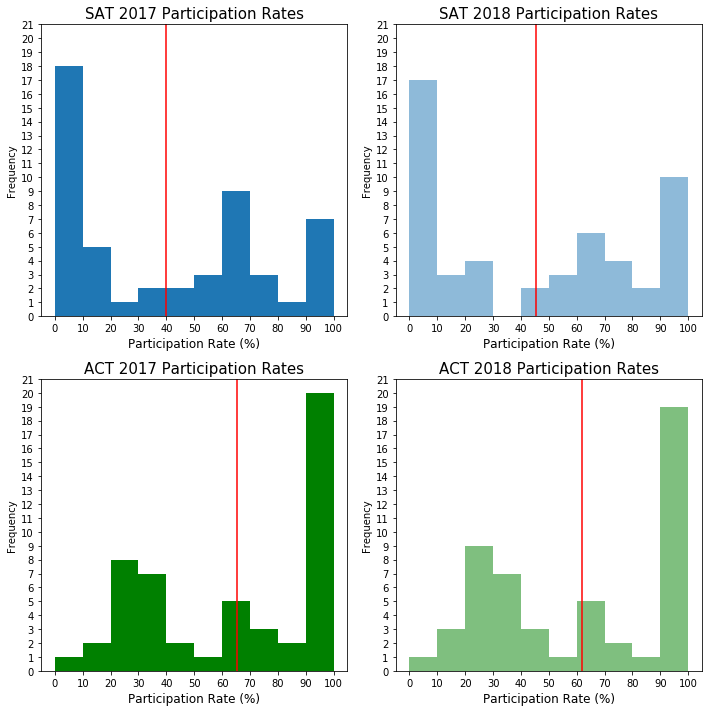

In [46]:
# Plot participation rates for SAT & ACT
subplot_histograms(dataframe = final, 
                   list_of_columns = ['sat_2017_participation', 'sat_2018_participation',
                                      'act_2017_participation', 'act_2018_participation'],
                   list_of_titles = ['SAT 2017 Participation Rates','SAT 2018 Participation Rates',
                                     'ACT 2017 Participation Rates','ACT 2018 Participation Rates'],
                   list_of_xlabels = ["Participation Rate (%)" for k in range(4)]);
# plt.savefig('SAT ACT Participation Rate Histograms')

<span style="color:blue"> **Interpretation:** SAT results for both years are right skewed, while ACT participation rates for both years are left skewed. This means that more states have a 100% ACT participation rate than the SAT does do participate in the ACT  

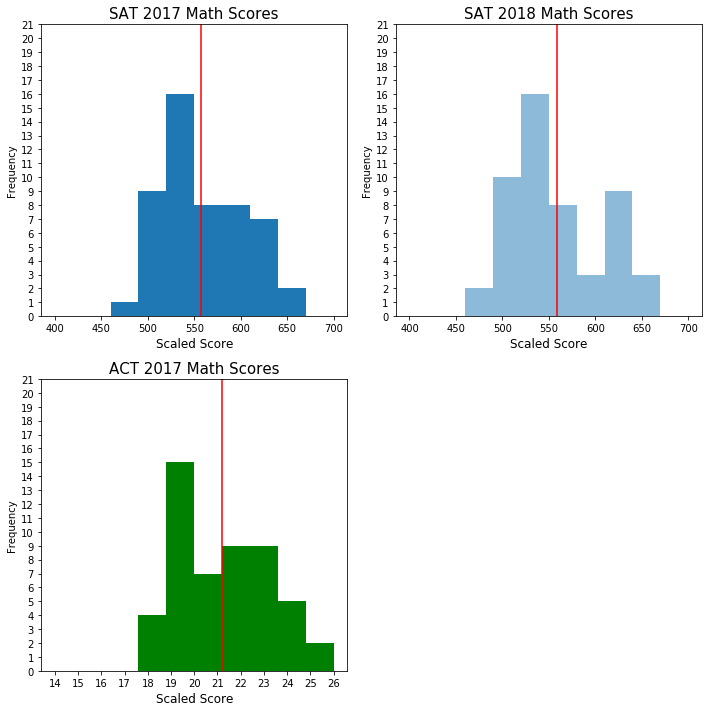

In [47]:
# Plot math scores for SAT & ACT
subplot_histograms(dataframe = final, 
                   list_of_columns = ['sat_2017_math', 'sat_2018_math',
                                      'act_2017_math'],
                   list_of_titles = ['SAT 2017 Math Scores','SAT 2018 Math Scores',
                                     'ACT 2017 Math Scores'],
                   list_of_xlabels = ["Scaled Score" for k in range(3)]);

<span style="color:blue"> **Interpretation:** For the SAT, distribution of scores in both years are very similar though to the right of the mean, more states have scored > 600 in 2018. This potentially shows an improvement in educational standards of those states over the year. In the ACT, most states scored between 19-20 on math, right under the mean.

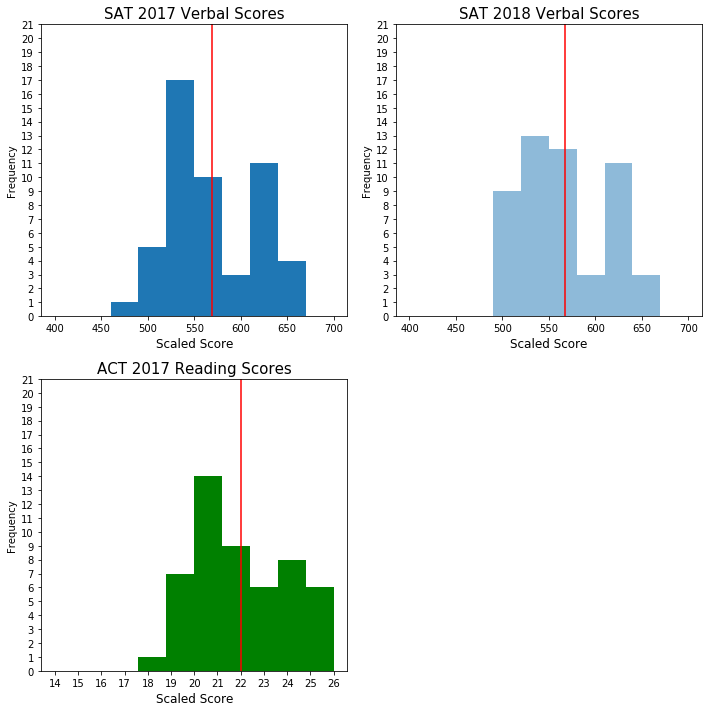

In [48]:
# Plot verbal scores for SAT & ACT
subplot_histograms(dataframe = final, 
                   list_of_columns = ['sat_2017_reading_and_writing', 'sat_2018_reading_and_writing',
                                      'act_2017_reading'],
                   list_of_titles = ['SAT 2017 Verbal Scores','SAT 2018 Verbal Scores',
                                     'ACT 2017 Reading Scores'],
                   list_of_xlabels = ["Scaled Score" for k in range(3)]);

<span style="color:blue"> **Interpretation:**
- <span style="color:blue"> For the SAT, distribution of scores in 2017 and 2018 were similar. However, in 2018, the worst performing states improved as we see the data become slightly more concentrated right below the mean.
- <span style="color:blue"> For the ACT Reading in 2017, we see a similar distribution to SAT 2017 Verbal's distribution, but slightly more uniform.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [49]:
# Create list of (x,y) pair of column titles from dataframe that we want to plot.
list_of_xy_pairs = [('sat_2017_math', 'act_2017_math'),
                   ('sat_2017_reading_and_writing', 'act_2017_english'),
                   ('sat_2017_total', 'act_2017_composite'),
                   ('sat_2017_total','sat_2018_total'),
                   ('act_2017_composite', 'act_2018_composite')]

# Create title mapping
title_mapping = {'sat_2017_participation':      'SAT Participation Rate (2017)',
                'sat_2017_reading_and_writing': 'SAT Verbal Score (2017)',
                'sat_2017_math':                'SAT Math Score (2017)',
                'sat_2017_total':               'SAT Total Score (2017)',
                 
                'sat_2018_participation':       'SAT Participation Rate (2018)',
                'sat_2018_reading_and_writing': 'SAT Verbal Score (2018)',
                'sat_2018_math':                'SAT Math Score (2018)',
                'sat_2018_total':               'SAT Total Score (2018)',

                'act_2017_participation':       'ACT Participation Rate (2017)',
                'act_2017_english':             'ACT English Score (2017)',
                'act_2017_math':                'ACT Math Score (2017)',
                'act_2017_reading':             'ACT Reading Score (2017)',
                'act_2017_science':             'ACT Science Score (2017)',
                'act_2017_composite':           'ACT Composite Score (2017)',

                'act_2018_participation':       'ACT Participation Rate (2018)',
                'act_2018_composite':           'ACT Composite Score (2018)'}

In [50]:
# Create function for scatter subplots
def subplot_scatter(dataframe, list_of_xy_pairs, title_mapping, list_of_titles):
    
    # Set up parent figure
    nrows = int(np.ceil(len(list_of_xy_pairs)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,12))
    ax = ax.ravel()
    
    for i, pair in enumerate(list_of_xy_pairs):
        # Pull name of column in dataframe that we want to plot 
        x_name, y_name = pair[0], pair[1]
        x_data, y_data = dataframe[x_name], dataframe[y_name]      
        
        # Plot scatterplot
        ax[i].scatter(x_data,y_data)

        # Format title and axis labels
        ax[i].set_title(list_of_titles[i], fontsize = 15)
        ax[i].set_xlabel(title_mapping[x_name], fontsize = 12)
        ax[i].set_ylabel(title_mapping[y_name], fontsize = 12);
        
        # Plot trendline
        z = np.polyfit(x_data, y_data, 1)
        p = np.poly1d(z)
        ax[i].plot(x_data,p(x_data),"r")
        
    if len(list_of_xy_pairs) % 2:
        plt.delaxes(ax[len(list_of_xy_pairs)])
    plt.tight_layout();

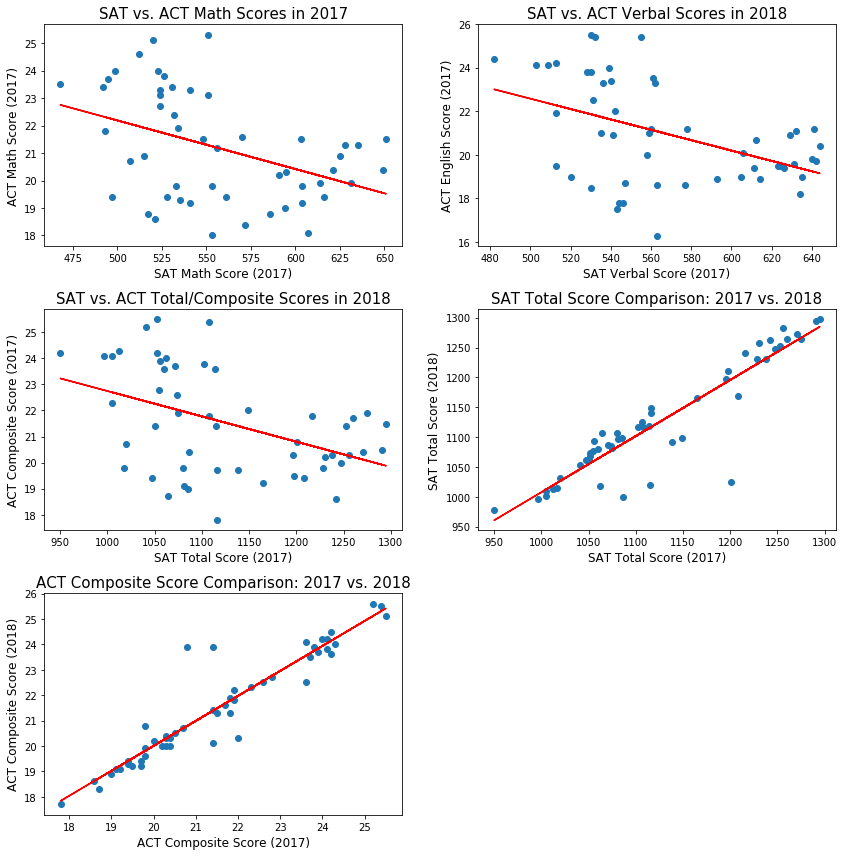

In [51]:
# Call function
subplot_scatter(final,
                list_of_xy_pairs,
                title_mapping,
                list_of_titles = ["SAT vs. ACT Math Scores in 2017",
                                 "SAT vs. ACT Verbal Scores in 2018",
                                 "SAT vs. ACT Total/Composite Scores in 2018",
                                 "SAT Total Score Comparison: 2017 vs. 2018",
                                 "ACT Composite Score Comparison: 2017 vs. 2018"])

<span style="color:blue"> **Interpretation:**
- <span style="color:blue"> There seems to be a rather weak negative correlation between supposedly analogous sections of different tests in the same year, though the clustering patterns across plots 1-3 look similar. This possibly suggests that actual material being tested in the math/verbal sections between the two tests are different.
- <span style="color:blue"> However, when we plot the scores of the same test across different years, there is a very strong positive correlation between the two. This makes sense since the exams are designed to be of comparable difficulty year over year.
- <span style="color:blue"> What's also interesting is that there are cases of a couple of outlier states in the ACT that did better in the test in 2018 than in 2017. However with the SAT, the outliers all did *worse* in 2018 than they did in 2017. Could this suggest the SAT was actually harder in 2018? Or there was this just due to idiosyncratic factors specific to these states?

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [52]:
# Create Ordered List of Columns
participation_cols = ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']
sat_section_cols = ['sat_2017_math', 'sat_2018_math', 'sat_2017_reading_and_writing', 'sat_2018_reading_and_writing']
sat_total_cols = ['sat_2017_total', 'sat_2018_total']
act_section_cols = ['act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science']
act_composite_cols = ['act_2017_composite', 'act_2018_composite']

In [53]:
##### Matplotlib Method: Create function for boxplots ##### (saved for my records, but won't use this in our assignment)

# def subplot_boxplot(dataframe, list_of_columns, title_mapping):
    
# #     # Set up parent figure
# #     nrows = int(np.ceil(len(list_of_columns)/2))
# #     fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (20,20))
# #     ax = ax.ravel()
    
#     for i, column in enumerate(list_of_columns):
#         # Plot scatterplot
#         ax[i].boxplot(dataframe[column])

#         # Format title and axis labels
#         ax[i].set_title("Boxplot of " + title_mapping[column])
#         ax[i].set_xlabel(title_mapping[column], fontsize = 10)

################################################################

# ## combine these different collections into a list    
# data_to_plot = [final[colname] for colname in participation_cols]

# fig = plt.figure(1, figsize=(9, 6))

# # Create an axes instance
# ax = fig.add_subplot(111)

# # Create the boxplot
# bp = ax.boxplot(data_to_plot)
# ax.set_title("Boxplots of SAT/ACT Participation Rates (%) in 2017-2018", size = 15)
# ax.set_xticklabels(['SAT 2017', 'SAT 2018','ACT 2017','ACT 2018']);

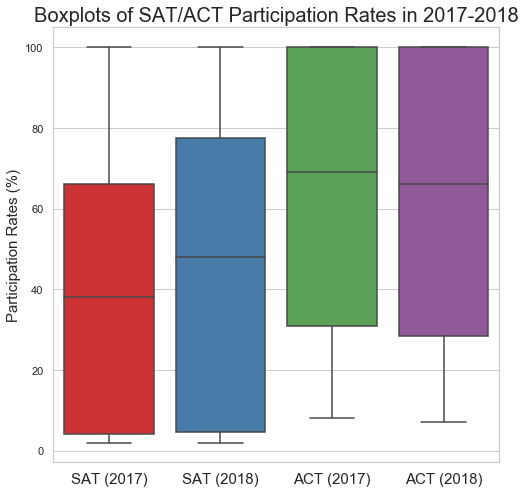

In [54]:
# Box Plots for Participation Rates (Seaborn Method)

sns.set(style="whitegrid")
plt.figure(1, figsize=(8, 8))

data_to_plot = final.loc[:,participation_cols]

ax = sns.boxplot(data = data_to_plot, palette = "Set1")
ax.set_title("Boxplots of SAT/ACT Participation Rates in 2017-2018", size = 20)
ax.set_xticklabels(['SAT (2017)', 'SAT (2018)','ACT (2017)','ACT (2018)'], size = 15)
ax.set_ylabel("Participation Rates (%)", size = 15);
# plt.savefig('SAT ACT Participation Rates Box Plot.png')

<span style="color:blue"> **Interpretation:** 
- <span style="color:blue"> The median SAT participation rates are much lower than the ACT, which shows that the ACT appears to be the more popular test than the SAT nationwide.
- <span style="color:blue"> By range, SAT results are also far more disperse, taking values from a min of 2% to a max of 100% while the ACT takes a slightly higher min of 7-8% to a max of 100%.
- <span style="color:blue"> Another measure of spread is the interquartile range, where we see the middle 50% of participation rates is substantial for all tests, more so in 2018 than 2017 for each respective test.

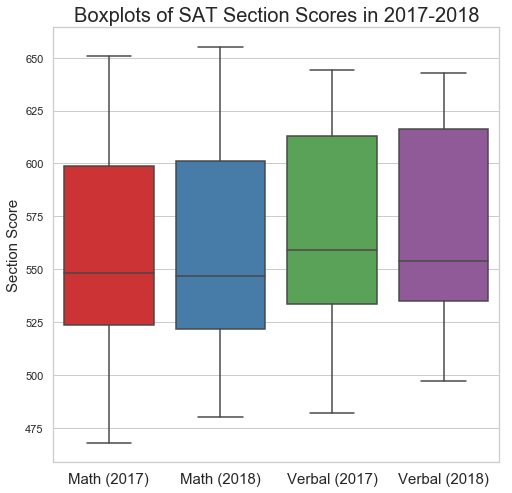

In [55]:
# Box Plots for SAT Section Scores (Seaborn Method)

sns.set(style="whitegrid")
plt.figure(1, figsize=(8, 8))

data_to_plot = final.loc[:,sat_section_cols]

ax = sns.boxplot(data = data_to_plot, palette = "Set1")
ax.set_title("Boxplots of SAT Section Scores in 2017-2018", size = 20)
ax.set_xticklabels(['Math (2017)', 'Math (2018)','Verbal (2017)','Verbal (2018)'], size = 15)
ax.set_ylabel("Section Score", size = 15);

<span style="color:blue"> **Interpretation:**
- <span style="color:blue"> The central tendency of each SAT section, measured by the median in the box plot above is fairly consistent around 550, with slightly higher scores in Verbal. This is however expected since the SAT is a standardized test constructed this way by design.
- <span style="color:blue"> Math scores have a wider range than Verbal scores in both years, which possibly show a wide range of mathematical aptitude across states, while slightly more consistent in the Verbal ability. Considering our data set is for the US only, it makes sense that Verbal scores would be "better" than Math scores given English is the native language for most of the students taking this test. We would see very different results if we pooled in SAT scores of students taking the test from abroad.
- <span style="color:blue"> Narrowing down our measure of spread to the IQR, we see that the size of the middle 50% is pretty consistent among both sections in both years however. This means that outliers aside, the sread of scores is consistent.

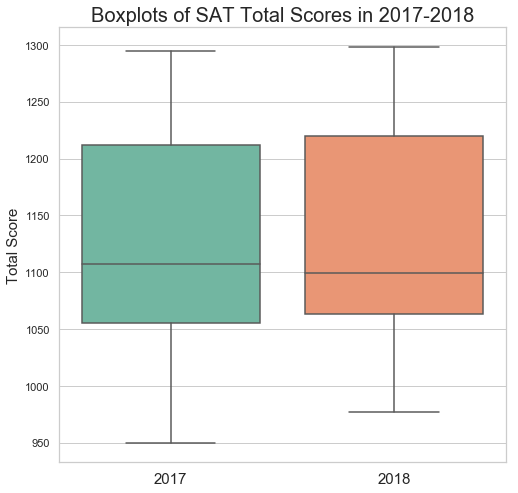

In [56]:
# Box Plots for SAT Total Scores (Seaborn Method)

sns.set(style="whitegrid")
plt.figure(1, figsize=(8, 8))

data_to_plot = final.loc[:,sat_total_cols]

ax = sns.boxplot(data = data_to_plot, palette = "Set2")
ax.set_title("Boxplots of SAT Total Scores in 2017-2018", size = 20)
ax.set_xticklabels(['2017', '2018'], size = 15)
ax.set_ylabel("Total Score", size = 15);

<span style="color:blue"> **Interpretation:** While the median total score fell slightly in 2018 compared to 2018, spread in terms of both range and IQR tightened slightly showing less dispersion.

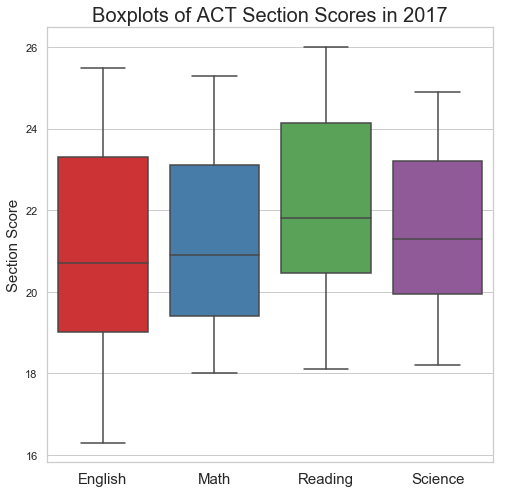

In [57]:
# Box Plots for ACT Section Scores (Seaborn Method)

sns.set(style="whitegrid")
plt.figure(1, figsize=(8, 8))

data_to_plot = final.loc[:,act_section_cols]

ax = sns.boxplot(data = data_to_plot, palette = "Set1")
ax.set_title("Boxplots of ACT Section Scores in 2017", size = 20)
ax.set_xticklabels(['English', 'Math', 'Reading', 'Science'], size = 15)
ax.set_ylabel("Section Score", size = 15);

act_composite_cols = ['act_2017_composite', 'act_2018_composite']

<span style="color:blue"> **Interpretation:** Compared to the SAT, there seems to be a lot less spread (in both range and IQR) in the quantitative subjects like Math and Science than the verbal sections like English and Reading. The range of scores in English and Reading are substantially larger than their Math and Science counterparts, and the median English score the lowest out of all 4 sections. This comes as a surprise considering this data was collected among US test takers like the SAT, but perhaps points to the difference in material and difficulty in analogous sections between the two tests.

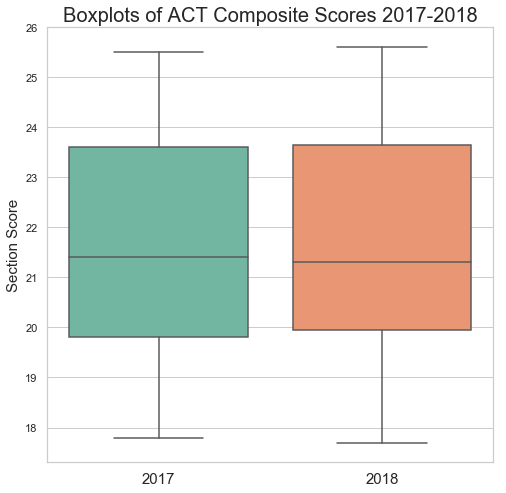

In [58]:
# Box Plots for ACT Composite Scores (Seaborn Method)

sns.set(style="whitegrid")
plt.figure(1, figsize=(8, 8))

data_to_plot = final.loc[:,act_composite_cols]

ax = sns.boxplot(data = data_to_plot, palette = "Set2")
ax.set_title("Boxplots of ACT Composite Scores 2017-2018", size = 20)
ax.set_xticklabels(['2017', '2018'], size = 15)
ax.set_ylabel("Section Score", size = 15);

<span style="color:blue"> **Interpretation:** Virtually no change in central tendency and spread in ACT Composite score year over year. If we were to be pedantic about it, there was a slight increase in range, but slight decrease in IQR in 2018 with a very slight decrease in the median score but by a fraction of a point.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<span style="color:blue"> Not really. With our current data, we could do violin plots but this would just be redundant considering we've already done histograms and box-and-whisker plots separately. There is not much we can do with just state-level data with a population size of 51.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

<span style="color:blue"> This would be far too messy to include 17 of these. I'm including one of them here (2017 SAT Participation Rate) to show that I've done this:

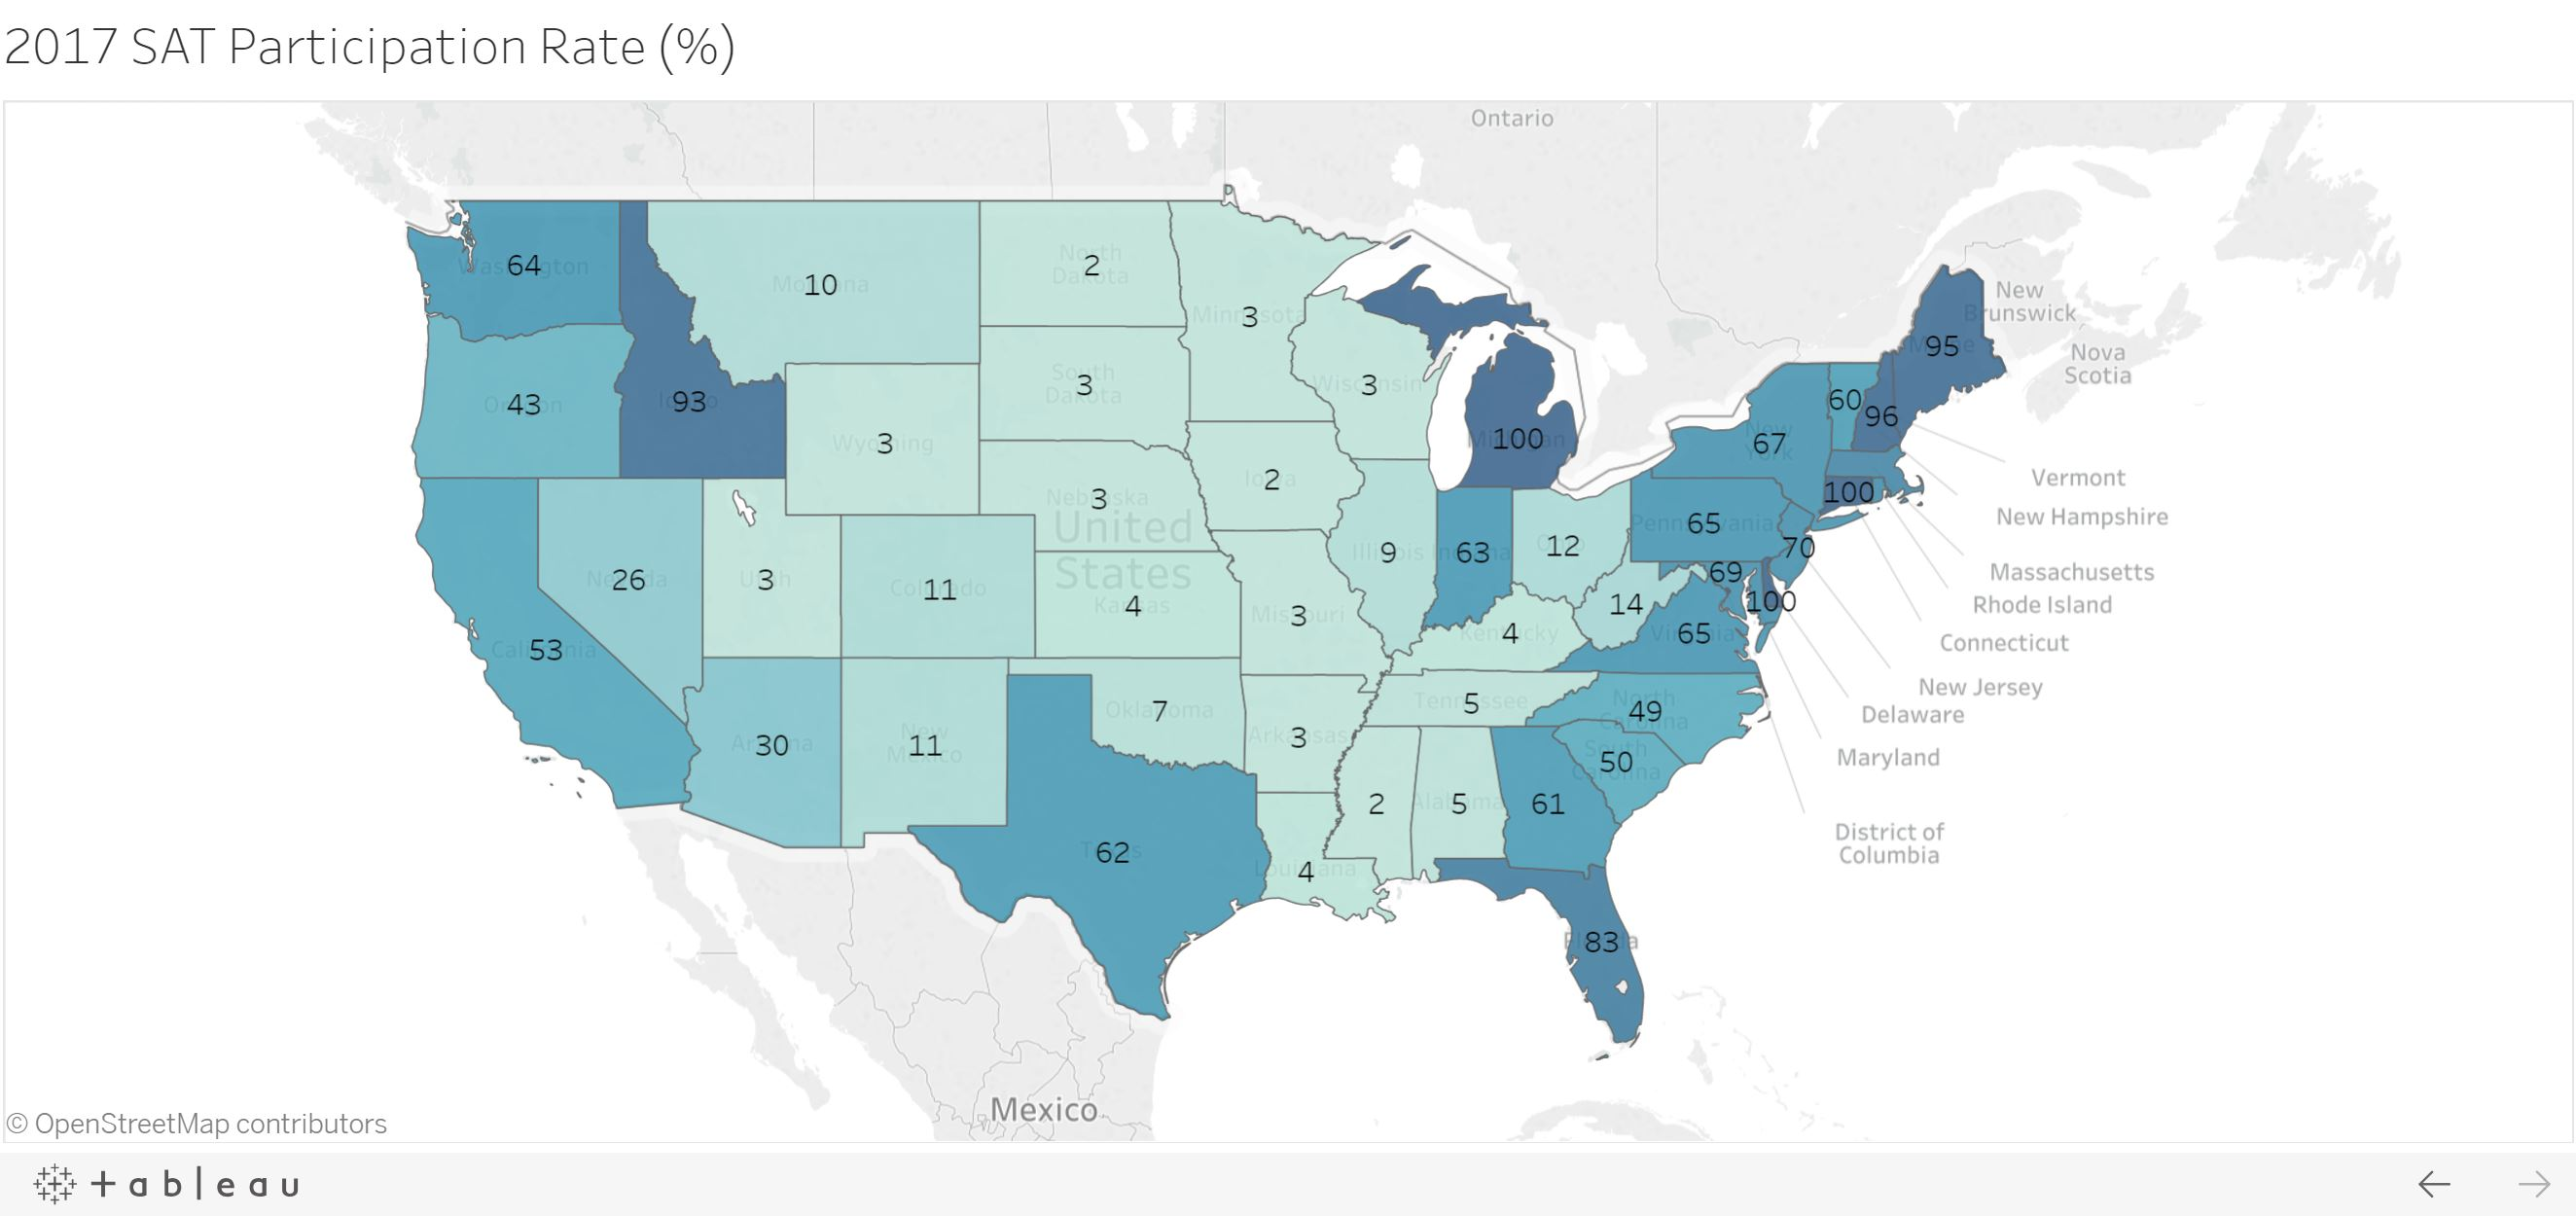

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

<span style="color:blue"> This is basically a repeat of what we have commented on above:
    
**Participation Rates**
- SAT results for both years are right skewed, while ACT participation rates for both 2017 and 2018 are left skewed. This means that more states have a 100% ACT participation rate than the SAT does do participate in the ACT.
- The median SAT participation rates are much lower than the ACT, which shows that the ACT appears to be the more popular test than the SAT nationwide.
- By range, SAT results are also far more disperse, taking values from a min of 2% to a max of 100% while the ACT takes a slightly higher min of 7-8% to a max of 100%.
- Another measure of spread is the interquartile range, where we see the middle 50% of participation rates is substantial for all tests, more so in 2018 than 2017 for each respective test.

**SAT Section Scores**
- For SAT Math, distribution of scores in both years are very similar though to the right of the mean, more states have scored > 600 in 2018. This potentially shows an improvement in educational standards of those states over the year.
- For SAT Verbal, distribution of scores in 2017 and 2018 were similar. However, in 2018, the worst performing states improved as we see the data become slightly more concentrated right below the mean.
- The central tendency of each SAT section, measured by the median in the box plot above is fairly consistent around 550, with slightly higher scores in Verbal. This is however expected since the SAT is a standardized test constructed this way by design.
- Math scores have a wider range than Verbal scores in both years, which possibly show a wide range of mathematical aptitude across states, while slightly more consistent in the Verbal ability. 
- Narrowing down our measure of spread to the IQR, we see that the size of the middle 50% is pretty consistent among both sections in both years however. This means that outliers aside, the sread of scores is consistent.
- While the median total score fell slightly in 2018 compared to 2018, spread in terms of both range and IQR tightened slightly showing less dispersion.

**ACT Scores**
- For ACT Math (2017), most states scored between 19-20 on math, right under the mean.
- For ACT Reading (2017), we see a similar distribution to SAT 2017 Verbal's distribution, but slightly more uniform.
- Compared to the SAT, there seems to be a lot less spread (in both range and IQR) in the quantitative subjects like Math and Science than the verbal sections like English and Reading. The range of scores in English and Reading are substantially larger than their Math and Science counterparts, and the median English score the lowest out of all 4 sections.
- Virtually no change in central tendency and spread in ACT Composite score year over year. If we were to be pedantic about it, there was a slight increase in range, but slight decrease in IQR in 2018 with a very slight decrease in the median score but by a fraction of a point.


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<span style="color:blue"> **Answer:** Not really. Though we see some sort of bell curve behavior, all features have skewed distributions, with some like the Verbal scores even exhibiting bimodal behavior as we see in our histograms above.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<span style="color:blue"> **Answer:**
- <span style="color:blue"> Strictly speaking, *normality does NOT hold* for any of these.
- <span style="color:blue"> However, the distribution of Math scores comes closest to being normal, especially SAT 2017 Math despite being slightly right skewed.
- <span style="color:blue"> Reading scores are almost bimodal judging by the shape of the distribution so not really normally distributed. Though because of that nature, we see bell-shaped occurrences around both peaks. Still, normality requires a single mode which should be equal to the mean and median with no skew.
- <span style="color:blue"> Participation rates are definitely not normal. They are the features that are furthest away from being normally distributed given their extreme occurence of tails: mode at 90-100% bin for ACT, while mode at 0-10% bin for SAT in both years.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<span style="color:blue"> **Answer**: No, it does not. We're already working with population level data. We are concerned about all SAT/ACT numbers throughout the US which have been provided to us. Statistical inference is only used when we wish to use a sample statistics to learn something about population parameters. Since we are already working with population parameters, we can draw conclusions on these parameters without need for sample estimation and inference.

<span style="color:blue">  (Another giveaway was the formula for Standard Deviation we were asked to construct above was for population standard deviation since it was computed using $\frac{1}{n}$ and not  $\frac{1}{n-1}$)

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

<span style="color:blue"> **Answer:** No, it is not because the scores are of different scales.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

<span style="color:blue"> We won't because as we mentioned above, it is not appropriate.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [59]:
# Pull top 3 and bottom 3 states with largest changes
top3 = final[['state','sat_participation_change','act_participation_change']].sort_values(by='sat_participation_change',ascending=False).head(3)
bottom3 = final[['state','sat_participation_change','act_participation_change']].sort_values(by='sat_participation_change',ascending=False).tail(3)

top3.append(bottom3)

,state,sat_participation_change,act_participation_change
13,Illinois,90,-50
39,Rhode Island,26,-6
5,Colorado,17,-70
2,Arizona,-1,4
28,Nevada,-3,0
8,District of Columbia,-8,0


<span style="color:blue"> ***My Research:***
    
**Colorado** *(+17% SAT Participation Change, -70% ACT Participation Change)*
- Pays for both the SAT and ACT, but requires the SAT.
    - *Source: https://www.princetonreview.com/college-advice/act-sat-state-requirements*
- Naturally, this results in an incentive to take the SAT.
- The Colorado Department of Education justifies this choice by claiming that the SAT "is closely aligned to challenging classroom work of Colorado schools and focuses on the key skills and concepts that evidence shows matter most for college and career readiness"
    - *Source: https://www.cde.state.co.us/assessment/coloradosat*

**Rhode Island** *(+26% SAT Participation Change, -6% ACT Participation Change)*
- SAT and PSAT tests became a graduation requirement in 2018 as part of the state's federal education plan
    - *Source: https://www.usnews.com/news/best-states/rhode-island/articles/2018-10-25/sat-participation-increases-scores-decline-in-ri*
- Part of this decision was a consequence of the debate on what test was appropriate for younger students in Grades 3 - 8. Previously, the Partnership for Assessment of Readiness for College and Careers (PARCC) was offered, but critics said the test was too long and too hard. Eventually, it became so controversial that the General Assembly and former education Commissioner backed away from making it a high-stakes graduation requirement. In light of that decision, RI also saw that PSAT and SAT tests weren't "high-stakes" since students didn't need to reach a certain score to graduate.
    - *Source: http://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores*
- Interestingly, RI does *NOT* pay for the SAT.
    - *Source: https://www.princetonreview.com/college-advice/act-sat-state-requirements*

**Illinois** *(+90% SAT Participation Change, -50% ACT Participation Change)*
- Requires the SAT *and* pays for it!
    - *Source: https://www.princetonreview.com/college-advice/act-sat-state-requirements*
- Similar to Rhode Island, Illinois is abandoning the PARCC
    - *Source: https://www.chicagotribune.com/news/local/breaking/ct-parcc-test-high-school-met-20160711-story.html*
- CollegeBoard (SAT Administrator) won a 3-year contract (with option for additional 3-year extension) with Illinois state after the state's previous ACT contract expired. Interestingly, ACT's bid was 5.7 million USD lower than Collegeboard's, but the cost when spread over 6 years was marginal for the state's budget
    - *Source: https://chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/*
- The SAT is part of Chicago Public Schools' Rating System: The SQRP. The scores make up 20% of the rating, giving schools an incentive to take the test
    - *Source: https://chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/*
- Part of decision influenced by partnership with Khan Academy to provide free SAT prep resources, something the ACT does not have with them
    - *Source: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html*

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<span style="color:blue"> Given the key benefits of taking the test multiple times (https://www.studypoint.com/ed/retake-the-sat/) and the shared desire between multiple states' board of education to prepare students for college, consider offering the test to Sophomores instead of juniors for free. They'll be more likely to retake the exam multiple times as a Junior and then a Senior, increasing revenues for College Board.
    
<span style="color:blue"> One state with a low participation rate that has not change year over year is Utah, which requires the ACT instead of the SAT. This is because the state emphasizes a science requirement (Source: https://rules.utah.gov/publicat/code/r277/r277-404.htm) which the SAT does not cover. College Board could therefore consider offering a science section similar to the ACT.